In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pybdshadow
from suncalc import get_position,get_times
from shapely.geometry import Polygon

In [9]:
building = gpd.read_file(r'../example/data/bd_demo.json')
#给定经纬度
lon1,lat1,lon2,lat2 = list(building.bounds.mean())
lon = (lon1+lon2)/2
lat = (lat1+lat2)/2

In [10]:
#建筑转换坐标系
building.crs = {'init':'epsg:4326'}
building = building.to_crs(epsg = 3857)
testbuilding = building.iloc[:4]

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
#时间
date = pd.to_datetime('2015-01-01 02:45:33.959797119')
#正午时间，获取太阳位置
sunPosition = get_position(date, lon, lat)
buildingshadow = testbuilding.copy()
buildingshadow['geometry'] = testbuilding.apply(lambda r:pybdshadow.bdshadow(r['geometry'],r['height'],sunPosition),axis = 1)


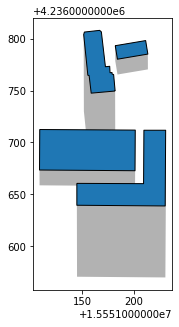

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1,(5,5))
ax = plt.subplot(111)

buildingshadow.plot(ax = ax,facecolor = (0,0,0,0.3))
testbuilding.plot(ax = ax,edgecolor = 'k')

plt.show()